In [86]:
##Importing all of the Libraries and Components Needed
## from https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
import pandas as pd
import numpy as np

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [87]:
##Import data that has been downloaded

# Defines the location of the  file
file_location = "C:\\Users\\Maggie\\Documents\\Python Scripts for NLP Work\\readability5 domain chg.xlsx"

# Read the tsv/txt file
tests_df = pd.read_excel(file_location)

In [88]:
##Block of Code for Descriptive Statistics

#shape
# print(tests_df.shape)

#head
# print(tests_df.head(20))

tests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1627 non-null   int64  
 1   state                       1627 non-null   object 
 2   year                        1546 non-null   float64
 3   grade                       1627 non-null   int64  
 4   domain                      1627 non-null   object 
 5   standard                    1437 non-null   object 
 6   pvalue                      1627 non-null   float64
 7   hasPic                      1627 non-null   int64  
 8   questionStem                1627 non-null   object 
 9   a                           1627 non-null   object 
 10  b                           1627 non-null   object 
 11  c                           1627 non-null   object 
 12  d                           1627 non-null   object 
 13  e                           1627 

In [89]:
#descriptions
print(tests_df.describe())

        Unnamed: 0         year        grade       pvalue       hasPic  \
count  1627.000000  1546.000000  1627.000000  1627.000000  1627.000000   
mean   2478.655808  2016.437904     5.664413     0.593146     0.348494   
std     923.184772     2.171683     1.728633     0.158400     0.476640   
min    1006.000000  2009.000000     3.000000     0.120000     0.000000   
25%    1676.500000  2016.000000     4.000000     0.480000     0.000000   
50%    2636.000000  2017.000000     6.000000     0.590000     0.000000   
75%    3042.500000  2018.000000     7.000000     0.710000     1.000000   
max    3988.000000  2019.000000     8.000000     0.950000     1.000000   

                id           CC           CD           DT           EX  ...  \
count  1627.000000  1627.000000  1627.000000  1627.000000  1627.000000  ...   
mean   2780.039951     0.733866     8.569760     5.200983     0.074370  ...   
std    1046.699483     1.404124     6.193022     4.524722     0.433812  ...   
min     522.00000

In [90]:
def update_pvalue_group(row):
    pvalue = row['pvalue']
    
    if pvalue <= 0.48:
        row['pvalue'] = 0
    elif pvalue <= 0.71:
        row['pvalue'] = 1
    else:
        row['pvalue'] = 2
    
    return row

tests_df = tests_df.apply(lambda row: update_pvalue_group(row), axis=1)

In [92]:
##Validation Part 1 Dataset Code

y_df = tests_df['pvalue']

#code to drop any columns that don't make sense [id]
X_df2 = tests_df.drop(columns = ['pos_tags', 'Unnamed: 0', 'pvalue', 'state', 'hasPic', 'year', 'standard', 'questionStem' , 'a', 'b', 'c', 'd', 'e', 'completeq', 'acedemic_polysemous_words'])

#, 'pvalue'

#head

X_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   grade                       1627 non-null   int64  
 1   domain                      1627 non-null   object 
 2   id                          1627 non-null   int64  
 3   CC                          1627 non-null   int64  
 4   CD                          1627 non-null   int64  
 5   DT                          1627 non-null   int64  
 6   EX                          1627 non-null   int64  
 7   FW                          1627 non-null   int64  
 8   IN                          1627 non-null   int64  
 9   JJ                          1627 non-null   int64  
 10  JJR                         1627 non-null   int64  
 11  JJS                         1627 non-null   int64  
 12  LS                          1627 non-null   int64  
 13  MD                          1627 

In [93]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

domain_val = X_df2[["domain"]]

# define ordinal encoding
domain_encoder = OneHotEncoder()
# transform data
domain_result = domain_encoder.fit_transform(domain_val)
domain_encoder.categories_

[array(['Algebra', 'Expressions and Equations', 'Functions', 'Geometry',
        'Measurement and Data', 'Number and Operations - Fractions',
        'Number and Operations in Base Ten',
        'Operations and Algebraic Thinking',
        'Ratios and Proportional Relationships',
        'Statistics and Probability', 'The Number System'], dtype=object)]

In [94]:
domain_cols = ['Algebra', 'Expressions and Equations', 'Functions', 'Geometry',
              'Measurement and Data', 'Number and Operations - Fractions',
              'Number and Operations in Base Ten',
              'Operations and Algebraic Thinking',
              'Ratios and Proportional Relationships',
              'Statistics and Probability', 'The Number System']

domain_df2 = pd.DataFrame(domain_result.toarray(), columns=domain_encoder.categories_[0])
domain_df2 = domain_df2[domain_cols]
domain_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Algebra                                1627 non-null   float64
 1   Expressions and Equations              1627 non-null   float64
 2   Functions                              1627 non-null   float64
 3   Geometry                               1627 non-null   float64
 4   Measurement and Data                   1627 non-null   float64
 5   Number and Operations - Fractions      1627 non-null   float64
 6   Number and Operations in Base Ten      1627 non-null   float64
 7   Operations and Algebraic Thinking      1627 non-null   float64
 8   Ratios and Proportional Relationships  1627 non-null   float64
 9   Statistics and Probability             1627 non-null   float64
 10  The Number System                      1627 non-null   float64
dtypes: f

In [95]:
X_df2 = X_df2.drop(columns = ['domain'])

In [96]:
X_df2 = X_df2.join(domain_df2)
X_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   grade                                  1627 non-null   int64  
 1   id                                     1627 non-null   int64  
 2   CC                                     1627 non-null   int64  
 3   CD                                     1627 non-null   int64  
 4   DT                                     1627 non-null   int64  
 5   EX                                     1627 non-null   int64  
 6   FW                                     1627 non-null   int64  
 7   IN                                     1627 non-null   int64  
 8   JJ                                     1627 non-null   int64  
 9   JJR                                    1627 non-null   int64  
 10  JJS                                    1627 non-null   int64  
 11  LS  

In [97]:

## Split-out validation dataset

#change to any range of columns that are in the model
X = X_df2.values
#change to y variable column index
y = y_df.astype(np.uint8).values
#adjust the 'test size' argument to change the amount that is kept out for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

print(y.ndim)

1


In [98]:
y_df.unique()

array([2, 0, 1], dtype=int64)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [100]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [36]:
X_selected = X_test_scaled[:10]
y_selected = y_test[:10]
y_selected

array([1, 0, 2, 1, 0, 1, 1, 0, 1, 0], dtype=uint8)

looking at model: RFR
0.49275983558426306
looking at model: LR
0.47506752789195533
looking at model: LDA
0.46889019377569
looking at model: KNN
0.43889019377569005
looking at model: CART
0.39811509101585435
looking at model: NB
0.2728479154433353
looking at model: SVM
0.4965825014679976


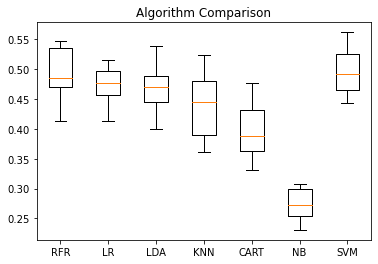

In [101]:
##Testing out the 6 models

# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# models.append(('LR', LinearRegression()))
# models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('LR', LogisticRegression(random_state=42, max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto', random_state=42, max_iter=10000)))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    print(f'looking at model: {name}')
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    #rmse = np.sqrt(-cv_results)
    results.append(cv_results)
    names.append(name)
    print(f'{np.mean(cv_results)}')
    

# Visual to Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()


In [102]:
##Raw code to make predictions (once we know which model was best - this one has SVC, a kind of SVM)

# Make predictions on validation dataset
model1 = SVC(gamma='auto', random_state=42, max_iter=10000)
model1.fit(X_train_scaled, y_train)
predictions = model1.predict(X_test_scaled)

# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.49693251533742333
[[  2  81   4]
 [  6 148   7]
 [  2  64  12]]
              precision    recall  f1-score   support

           0       0.20      0.02      0.04        87
           1       0.51      0.92      0.65       161
           2       0.52      0.15      0.24        78

    accuracy                           0.50       326
   macro avg       0.41      0.37      0.31       326
weighted avg       0.43      0.50      0.39       326



In [104]:
##Code to make cross-validated predictions (once we know which model was best - this one has SVC, a kind of SVM)

# Make predictions on validation dataset
model1 = SVC(gamma='auto', random_state=42, max_iter=10000)
model1.fit(X_train_scaled, y_train)
predictions = model1.predict(X_test_scaled)

cvpred2 = cross_val_predict(model1, X_train_scaled, y_train, cv=10)

# Evaluate predictions
print(accuracy_score(y_train, cvpred2))
print(confusion_matrix(y_train, cvpred2))
print(classification_report(y_train, cvpred2))

0.49884704073789393
[[ 23 308  17]
 [ 12 598  31]
 [  6 278  28]]
              precision    recall  f1-score   support

           0       0.56      0.07      0.12       348
           1       0.51      0.93      0.66       641
           2       0.37      0.09      0.14       312

    accuracy                           0.50      1301
   macro avg       0.48      0.36      0.31      1301
weighted avg       0.49      0.50      0.39      1301



In [50]:
model = SVC(gamma='auto')

In [51]:
model.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [41]:
import pickle

filename = 'p_value_svc_2.pickle'
pickle.dump(model, open(filename, 'wb'))